In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import nibabel as nib 
import os
import matplotlib.pyplot as plt
import tkinter


In [27]:
def show_slices(img, slices):
    """ Function to display row of image slices """
    x, y, z = slices
    slices = [img[x, :,:], img[:, y, :], img[:, :, z]]
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

In [206]:
# set lesion mask directory
lesionmask_dir = '/Users/emilyolafson/GIT/ENIGMA/data/lesionmasks/all_lesionmasks_2009tov6_usingSym_rename/'

# load stroke demog data
enigma=pd.read_csv('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/cortical_atrophy/data/Behaviour_Information_ALL_April7_2022.csv', header=0)

sublist = os.listdir(lesionmask_dir)
niftis=[]
sublist_ids=[]
niftis_array=np.zeros(shape=(182, 218, 182,1))

for sub in sublist:
    subject=enigma[enigma['BIDS_ID']==sub[0:12]].reindex()
    istrue = subject['LESIONED_HEMISPHERE']==1
    if istrue.iloc[0]: #only keep subjects w left hemisphere stroke.
        niftis.append(nib.load(lesionmask_dir + sub))
        sublist_ids.append(sub[0:12])
        #niftis_array= np.append(niftis_array, np.reshape(nib.load(lesionmask_dir + sub).get_fdata(), [182, 218, 182, 1]),axis=3)
        # whatever. building this in matlab bc jupyter notebook is too slow with matrices.
        
np.savetxt('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/lefthem_lesion_arraysublist.txt', sublist_ids, fmt='%s')
#np.save('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/lefthem_lesion_array.npy', niftis_array) # save the big matrix


In [155]:
print(niftis_array.shape)
np.save('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/lefthem_lesion_array.npy', niftis_array) # save the big matrix


(182, 218, 182, 165)


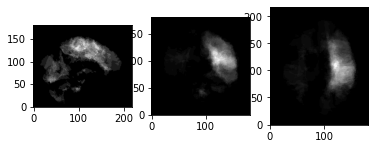

In [154]:
# plot frequency of of left hemisphere lesions
img=np.mean(niftis_array, axis=3)
show_slices(img, [100,100,100])

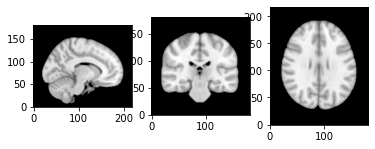

In [29]:
# load mni v6 template.
mni_template = nib.load('/usr/local/fsl/data/standard/MNI152_T1_1mm_brain.nii.gz').get_fdata()
show_slices(mni_template, [100, 100, 100])

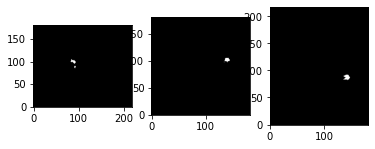

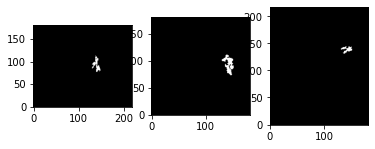

In [184]:
# load brodmann area template.
# ba 39 (no equiv). but inferior parietal lobe PF cm = J 29/30 
# ba 44 = J 13(L)/14(R)

atlas = nib.load('/usr/local/fsl/data/atlases/Juelich/Juelich-maxprob-thr50-1mm.nii.gz')
atlas = atlas.get_fdata()
atlasba39 = atlas == 29
atlasba44 = atlas == 13

show_slices(atlasba39, [142,84,100])
show_slices(atlasba44, [142,140,100])

size_ba39 = np.sum(np.array(atlasba39,dtype=bool))
size_ba44 = np.sum(np.array(atlasba44,dtype=bool))

In [200]:
# generate simulated deficit meaures for each subejct 
counter = 0
deficit=np.zeros(shape=len(niftis))
for sub in niftis:
    
    sub_data=sub.get_fdata()
    subjid = sublist_ids[counter]
    
    # overlap between lesion and brodmann areas
    overlap39 = np.sum(sub_data*atlasba39)/size_ba39
    overlap44 = np.sum(sub_data*atlasba44)/size_ba44
    
    # if more than 20% of the voxels in either ba39 or ba44 are damaged, subj has deficit with 90% probability
    if (overlap39 > .20) or (overlap44 > .20):
        rand_draw = np.random.uniform(0, 1)
        if rand_draw < 0.9:
            deficit[counter]=1
        else:
            deficit[counter]=0
    else:
        deficit[counter]=0
    counter = counter +1

In [201]:
print(deficit.shape)
print(deficit)

(515,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0